In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(1, '../')
from genetic_selection import GeneticSelectionCV
from sklearn.tree import ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, make_scorer
from sklearn.utils.validation import check_consistent_length

In [3]:
def eval(name, X_train, y_train, X_test, y_test):
    model = MLPClassifier(hidden_layer_sizes=(128,128), activation="relu", solver="adam",
                          learning_rate="adaptive", learning_rate_init=0.0003, 
                          batch_size=64, max_iter=300, 
                          early_stopping=True, n_iter_no_change=30)
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    print(f"{name}")
    print("\nClassification report:\n")
    print(classification_report(y_test, y_preds))
    print("\nConfusion matrix:\n")
    print(confusion_matrix(y_test, y_preds))

    return (
        name,
        accuracy_score(y_test, y_preds)*100,
        precision_score(y_test, y_preds, average="weighted")*100,
        recall_score(y_test, y_preds, average="weighted")*100,
        f1_score(y_test, y_preds, average="weighted")*100       
    )

In [4]:
df_train = pd.read_csv('../UNSW-NB15/cleaned_data/UNSW_NB15_training-set_cleaned.csv')
df_validation = pd.read_csv('../UNSW-NB15/cleaned_data/UNSW_NB15_validation-set_cleaned.csv')
df_test = pd.read_csv('../UNSW-NB15/cleaned_data/UNSW_NB15_testing-set_cleaned.csv')
X_train, y_train = df_train.iloc[:, 0:-2], df_train.iloc[:, -2]
X_validation, y_validation = df_validation.iloc[:, 0:-2], df_validation.iloc[:, -2]
X_test, y_test = df_test.iloc[:, 0:-2], df_test.iloc[:, -2]

In [ ]:
def custom_balanced_f1_score(y_true, y_pred):
    labels=[0,1,2,3,4,5]
    classwise_f1_scores = f1_score(y_true, y_pred, labels=labels, average=None)
    _score = 0
    for i in range(len(classwise_f1_scores)):
        _score += classwise_f1_scores[i]*(len(y_true)/sum([1 for y in y_true if y == i])
    
    return _score

In [5]:
def genetic_selector(X_train, y_train, use_validation_set=False, X_validation=None, y_validation=None, verbose=0):
    selector = GeneticSelectionCV(
        estimator=ExtraTreeClassifier(), 
        scoring=make_scorer(f1_score, average="weighted"),
        n_population=40, 
        n_generations=100, 
        n_gen_no_change=12, 
        verbose=verbose,
        n_jobs=-1
        )
    selector.fit(X_train, y_train, use_validation_set=use_validation_set, valid_X=X_validation, valid_y=y_validation)
    print("no. of columns selected:")
    print(sum([1 for support in selector.support_ if support]))
    return selector

In [6]:
result_df = pd.DataFrame(columns=["name", "accuracy", "precison", "recall", "f1-score"])

In [7]:
validation_selector = genetic_selector(X_train, y_train, use_validation_set=True, X_validation=X_validation, y_validation=y_validation, verbose=1)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                               	min                            	max                                  
0  	40    	[   0.74293  106.8        0.     ]	[  0.062947  53.515045   0.      ]	[ 0.457344  7.        0.      ]	[   0.788532  193.          0.      ]
1  	24    	[   0.770347  134.95        0.      ]	[  0.008926  36.93166    0.      ]	[  0.749459  36.         0.      ]	[   0.788532  189.          0.      ]
2  	22    	[   0.775361  142.35        0.      ]	[  0.006648  28.529415   0.      ]	[  0.758986  71.         0.      ]	[   0.788532  189.          0.      ]
3  	24    	[   0.777209  143.6         0.      ]	[  0.008033  25.852273   0.      ]	[  0.748469  98.         0.      ]	[   0.788532  189.          0.      ]
4  	26    	[   0.778667  143.          0.      ]	[  0.006723  22.063545   0.      ]	[   0.764491  103.          0.      ]	[   0.788668  189.          0.      ]
5  	24    	[   0.779321 

In [8]:
X_train_valid_selected = validation_selector.transform(X_train)
X_test_valid_selected = validation_selector.transform(X_test)
result_df.loc[len(result_df.index)] = [*eval("validation-genetic-selection", X_train_valid_selected, y_train, X_test_valid_selected, y_test)]

validation-genetic-selection

Classification report:

              precision    recall  f1-score   support

           0       0.32      0.08      0.13      2044
           1       0.62      0.82      0.70      5566
           2       0.43      0.25      0.32      3031
           3       1.00      0.96      0.98      9436
           4       0.87      0.95      0.91     18500
           5       0.88      0.80      0.84      1748

    accuracy                           0.83     40325
   macro avg       0.69      0.64      0.65     40325
weighted avg       0.81      0.83      0.81     40325


Confusion matrix:

[[  170  1618    53     7   179    17]
 [  215  4546   102     1   616    86]
 [   90   599   761     0  1561    20]
 [   34   204    35  9064    93     6]
 [    8   127   797     1 17513    54]
 [   12   263     2     0    66  1405]]


In [9]:
selector = genetic_selector(X_train, y_train, verbose=1)

Selecting features with genetic algorithm.
gen	nevals	avg                                  	std                               	min                            	max                                  
0  	40    	[   0.816728  100.65        0.010294]	[  0.090367  55.654986   0.004438]	[ 0.329512  5.        0.000383]	[   0.857452  194.          0.02615 ]
1  	18    	[   0.853082  140.95        0.008665]	[  0.004816  34.394731   0.000853]	[  0.832273  54.         0.007277]	[   0.858476  194.          0.011198]
2  	23    	[   0.855333  149.975       0.00841 ]	[  0.001742  26.501403   0.000913]	[  0.851979  64.         0.006851]	[   0.858476  194.          0.010049]
3  	28    	[   0.855867  140.7         0.008552]	[  0.001783  26.071249   0.001147]	[  0.850965  64.         0.005182]	[   0.860212  180.          0.010702]
4  	26    	[   0.856766  130.475       0.008398]	[  0.001614  26.92117    0.001268]	[  0.853517  64.         0.005849]	[   0.860212  158.          0.011746]
5  	16    	[   0.8579

In [10]:
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
result_df.loc[len(result_df.index)] = [*eval("genetic-selection", X_train_selected, y_train, X_test_selected, y_test)]

genetic-selection

Classification report:

              precision    recall  f1-score   support

           0       0.37      0.09      0.15      2044
           1       0.60      0.89      0.72      5566
           2       0.34      0.36      0.35      3031
           3       1.00      0.96      0.98      9436
           4       0.91      0.86      0.89     18500
           5       0.81      0.79      0.80      1748

    accuracy                           0.81     40325
   macro avg       0.67      0.66      0.65     40325
weighted avg       0.81      0.81      0.80     40325


Confusion matrix:

[[  191  1732    47     2    54    18]
 [  196  4961   103     4   209    93]
 [   40   633  1105     0  1235    18]
 [   19   253    41  9100    17     6]
 [   64   359  1956     1 15940   180]
 [    3   300    22     0    39  1384]]


In [11]:
df_train_und = df_train.drop_duplicates()
X_train_und, X_train_und_num, y_train_und = df_train_und.iloc[:, 0:-2], df_train_und.iloc[:, 0:39],  df_train_und.iloc[:, -2]
df_validation_und = df_validation.drop_duplicates()
X_validation_und, X_validation_und_num, y_validation_und = df_validation_und.iloc[:, 0:-2], df_validation_und.iloc[:, 0:39],  df_validation_und.iloc[:, -2]

In [12]:
validation_und_selector = genetic_selector(X_train_und, y_train_und, use_validation_set=True, X_validation=X_validation_und, y_validation=y_validation_und, verbose=1)

Selecting features with genetic algorithm.
gen	nevals	avg                                  	std                               	min                               	max                                  
0  	40    	[   0.731622  105.075       0.      ]	[  0.03443   50.677109   0.      ]	[  0.583656  15.         0.      ]	[   0.775384  194.          0.      ]
1  	14    	[   0.751614  112.05        0.      ]	[  0.013213  61.236815   0.      ]	[  0.715322  15.         0.      ]	[   0.775384  194.          0.      ]
2  	24    	[   0.757881  120.65        0.      ]	[  0.009573  59.758493   0.      ]	[  0.725991  15.         0.      ]	[   0.775384  189.          0.      ]
3  	25    	[   0.760443  116.925       0.      ]	[  0.007564  61.461934   0.      ]	[  0.740645  15.         0.      ]	[   0.775384  182.          0.      ]
4  	26    	[  0.763284  78.05       0.      ]   	[  0.015578  54.739816   0.      ]	[  0.679704  21.         0.      ]	[   0.786284  180.          0.      ]
5  	28    	[  0

In [13]:
X_train_valid_und_selected = validation_und_selector.transform(X_train)
X_test_valid_und_selected = validation_und_selector.transform(X_test)
result_df.loc[len(result_df.index)] = [*eval("unduplicated-validation-genetic-selection", X_train_valid_und_selected, y_train, X_test_valid_und_selected, y_test)]

unduplicated-validation-genetic-selection

Classification report:

              precision    recall  f1-score   support

           0       0.64      0.01      0.03      2044
           1       0.52      0.82      0.63      5566
           2       0.34      0.02      0.05      3031
           3       1.00      0.96      0.98      9436
           4       0.78      0.93      0.85     18500
           5       0.30      0.01      0.01      1748

    accuracy                           0.77     40325
   macro avg       0.60      0.46      0.42     40325
weighted avg       0.73      0.77      0.71     40325


Confusion matrix:

[[   29  1622     3    13   362    15]
 [   11  4571    29     4   943     8]
 [    1   843    75     0  2112     0]
 [    3   198     3  9069   160     3]
 [    1  1218   110     1 17170     0]
 [    0   407     0     1  1329    11]]


In [14]:
import seaborn as sb

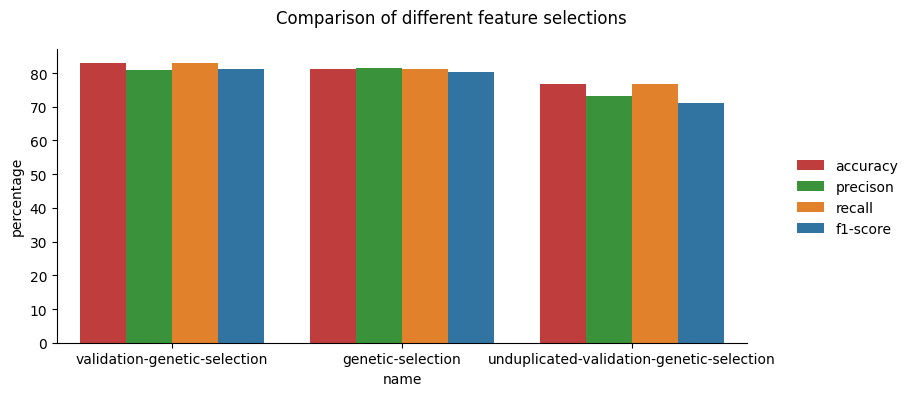

In [15]:
result_dfm = pd.melt(result_df, id_vars=("name"), value_vars=("accuracy", "precison", "recall", "f1-score"), var_name="metric", value_name="percentage")
g = sb.FacetGrid(result_dfm, height=4, aspect=2, )
g.map_dataframe(sb.barplot, data=result_dfm, x="name", y="percentage", hue="metric", palette=["tab:red", "tab:green", "tab:orange", "tab:blue"])
g.fig.suptitle("Comparison of different feature selections")
g.add_legend()
g.tight_layout()

In [16]:
result_df

,name,accuracy,precison,recall,f1-score
0,validation-genetic-selection,82.973342,80.754637,82.973342,81.050364
1,genetic-selection,81.044017,81.451216,81.044017,80.394611
2,unduplicated-validation-genetic-selection,76.689399,73.272395,76.689399,71.027460
